<a href="https://colab.research.google.com/github/sunnyday2/challenge3-data-science-TelecomX-parte2/blob/main/TelecomX_LATAM_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar el archivo CSV que contiene los datos tratados anteriormente**

Carga el archivo CSV que contiene los datos tratados anteriormente.

📂 **Atención**: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

In [2]:
datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Challenge 3 - Telecom X/datos_churn_filtrados.csv')
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,Cuentas_Diarias,tenure_interval,TotalPayed,TotalPayed_interval
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,0,1,1,1,65.60,593.30,2.186667,"(6, 12]",590.40,"(500, 1000]"
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,1,0,0,1,59.90,542.40,1.996667,"(6, 12]",539.10,"(500, 1000]"
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,...,0,0,1,0,73.90,280.85,2.463333,"(0, 6]",295.60,"(0, 500]"
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,...,1,0,1,0,98.00,1237.85,3.266667,"(12, 18]",1274.00,"(1000, 1500]"
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,...,0,0,1,1,83.90,267.40,2.796667,"(0, 6]",251.70,"(0, 500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,0,13,1,0,0,...,0,1,0,1,55.15,742.90,1.838333,"(12, 18]",716.95,"(500, 1000]"
7039,9992-RRAMN,1,1,0,1,0,22,1,1,1,...,1,0,1,0,85.10,1873.70,2.836667,"(18, 24]",1872.20,"(1500, 2000]"
7040,9992-UJOEL,0,1,0,0,0,2,1,0,0,...,0,0,1,1,50.30,92.75,1.676667,"(0, 6]",100.60,"(0, 500]"
7041,9993-LHIEB,0,1,0,1,1,67,1,0,0,...,1,2,0,1,67.85,4627.65,2.261667,"(66, 72]",4545.95,"(4500, 5000]"


In [3]:
for column in datos.columns:
  print('\r\n*******\n')
  print(column, ':', datos[column].unique())



*******

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

*******

Churn : [0 1]

*******

gender : [0 1]

*******

SeniorCitizen : [0 1]

*******

Partner : [1 0]

*******

Dependents : [1 0]

*******

tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

*******

PhoneService : [1 0]

*******

MultipleLines : [ 0  1 -1]

*******

InternetService : [ 0  1 -1]

*******

OnlineSecurity : [ 0  1 -1]

*******

OnlineBackup : [ 1  0 -1]

*******

DeviceProtection : [ 0  1 -1]

*******

TechSupport : [ 1  0 -1]

*******

StreamingTV : [ 1  0 -1]

*******

StreamingMovies : [ 0  1 -1]

*******

Contract : [1 0 2]

*******

PaperlessBilling : [1 0]

*******

PaymentMethod : [1 0 3 2]

*******

ChargesMonthly : [65.6  59.9  73.9  ... 91.75 68.8  67.85]

*******

Char

# **Eliminación de Columnas Irrelevantes**

Eliminar columnas irrelevantes o que se usaron para graficar:
*   customerID
*   gender
*   SeniorCitizen
*   Partner
*   Dependents
*   Cuentas_Diarias (se deduce desde ChargesMonthly)
*   tenure_interval
*   TotalPayed
*   TotalPayed_interval

In [4]:
# eliminamos las columnas que irrelevantes o que se usaron para graficar
datos = datos.drop(columns=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
                            , 'Cuentas_Diarias', 'tenure_interval','TotalPayed', 'TotalPayed_interval'
                            ])
datos.columns

Index(['Churn', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'ChargesMonthly', 'ChargesTotal'],
      dtype='object')

## **Revisar los valores de columnas codependientes**

Revisar los valores de columnas codependientes de `PhoneService=0 `y `InternetService=0`

1.   Si no tiene contratado servicio de internet, no deben existir los servicios dependientes de ese

In [5]:
#                                  | DeviceProtection==1 \
datos.query("(InternetService==0)&( OnlineSecurity==1 \
                                  | OnlineBackup==1 \
                                  | TechSupport==1 \
                                  | StreamingTV==1 \
                                  | StreamingMovies==1 )"
      )[['InternetService', 'OnlineSecurity', 'OnlineBackup'
        , 'TechSupport', 'StreamingTV', 'StreamingMovies', 'DeviceProtection']].value_counts()


InternetService  OnlineSecurity  OnlineBackup  TechSupport  StreamingTV  StreamingMovies  DeviceProtection
0                1               1             1            1            1                1                   143
                                 0             0            0            0                0                   106
                 0               1             0            0            0                0                    97
                 1               0             1            1            1                1                    79
                                 1             1            0            0                0                    78
                                                                                                             ... 
                 0               1             0            1            0                1                    12
                 1               1             0            1            1                0                    12
                 0               1             1            0            1                1                    11
                 1               0             0            1            0                1                    11
                                 1             0            1            0                1                    11
Name: count, Length: 62, dtype: int64

2.   Si existe la información sobre protección del equipo, cuando no se ha contratado ni servicio de internet ni telefónico

In [6]:
datos[(datos['DeviceProtection']==1) & ((datos['PhoneService']==0) & (datos['InternetService']==0))][['InternetService', 'PhoneService', 'DeviceProtection']].value_counts()

,,,count
InternetService,PhoneService,DeviceProtection,
0,0,1,305


3.   Si existe la información sobre multiples lineas telefónicas, cuando el servicio telefónico no esta contratado

In [7]:
datos[(datos['PhoneService']==0)&(datos['MultipleLines']==1)].value_counts()

,,,,,,,,,,,,,,,,count
Churn,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,


## **Volver a los valores categóricos**

Volvemos a los valores categóricos, para su posterior transformación en las columnas con OneHotEncoder.

In [8]:
datos['MultipleLines'] = datos['MultipleLines'].map({0:'No', 1:'Yes', -1:'No phone service'})
datos['InternetService'] = datos['InternetService'].map({0:'DSL', 1:'Fiber optic', -1:'No'})
datos['OnlineSecurity'] = datos['OnlineSecurity'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['OnlineBackup'] = datos['OnlineBackup'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['DeviceProtection'] = datos['DeviceProtection'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['TechSupport'] = datos['TechSupport'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['StreamingTV'] = datos['StreamingTV'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['StreamingMovies'] = datos['StreamingMovies'].map({0:'No', 1:'Yes', -1:'No internet service'})
datos['Contract'] = datos['Contract'].map({0:'Month-to-month', 1:'One year', 2:'Two year'})
datos['PaymentMethod'] = datos['PaymentMethod'].map({0:'Electronic check', 1:'Mailed check', 2:'Bank transfer (automatic)', 3:'Credit card (automatic)'})
datos['PhoneService'] = datos['PhoneService'].map({0:'No', 1:'Si'})


In [9]:
import plotly.express as px

In [10]:
# Permanencia por Tipo de Contrato
px.box(datos, x='tenure', color='Contract')

In [11]:
# Tiempo permanencia y evación
px.box(datos, x='tenure', color='Churn')

# **Transformar las variables categóricas a formato numérico**

1.   Realizar la transformación de las variables categóricas, para hacerlas compatibles con los algoritmos de machine learning. Transformar formato de texto, al formato numérico con el `OneHotEncoder`, utilizando el parámetro `drop='if_binary'` si alguna variable tiene solo 2 categorías.
2.   Realizar la separación de la base de datos de churn entre las **variables explicativas**, almacenando en una variable `X` y la **variable objetivo** en `y`.

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Ejemplo de tus columnas categóricas
categoricas = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection'
              , 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'PhoneService'
              ]
# OneHotEncoder sin verbose_feature_names_out
ohe = OneHotEncoder(drop='if_binary')

# ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('ohe', ohe, categoricas)
    ],
    remainder='passthrough',
    sparse_threshold=0
)

# Simulamos tus datos
# Transformando las variables explicativas
#print('Transformando las variables explicativas')
X = datos.drop('Churn', axis=1)
y = datos['Churn']

# Ajustamos y transformamos
datos_transformados = ct.fit_transform(X)

# Obtenemos nombres de columnas SIN prefijo "ohe__"
nombres_columnas = [
    col.split("__")[-1] for col in ct.get_feature_names_out()
]

# Creamos DataFrame limpio
X = pd.DataFrame(datos_transformados, columns=nombres_columnas)

print(f'\r\nColumnas transformadas: {X.columns}')
print(f'\r\nCantidad de columnas: {len(X.columns)}')



Columnas transformadas: Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Si', 'tenu

In [13]:
X.sample(5)

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Si,tenure,PaperlessBilling,ChargesMonthly,ChargesTotal
2816,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,63.0,1.0,86.70,5309.50
4133,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,35.0,0.0,20.10,655.30
817,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,19.65,19.65
635,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,63.0,1.0,89.60,5538.80
4564,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,5.0,1.0,82.75,417.75


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MultipleLines_No                         7043 non-null   float64
 1   MultipleLines_No phone service           7043 non-null   float64
 2   MultipleLines_Yes                        7043 non-null   float64
 3   InternetService_DSL                      7043 non-null   float64
 4   InternetService_Fiber optic              7043 non-null   float64
 5   InternetService_No                       7043 non-null   float64
 6   OnlineSecurity_No                        7043 non-null   float64
 7   OnlineSecurity_No internet service       7043 non-null   float64
 8   OnlineSecurity_Yes                       7043 non-null   float64
 9   OnlineBackup_No                          7043 non-null   float64
 10  OnlineBackup_No internet service         7043 no

# **Verificar la Proporción de Cancelación (Churn)**

Calcular la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúar si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [15]:
y.value_counts()

,count
Churn,
0,5174
1,1869


Las clases estan muy desequilibradas, por lo tanto, es necesario a balancear la clase con valor Churn=1, pero se debe hacer solo sobre el conjunto de datos de entrenamiento. Por lo tanto, antes, para no afectar a la validación, los datos deben ser separados.

# Dividiendo los datos entre entrenamiento, validacón y prueba

Para comprender si el modelo realmente está aprendiendo de los datos, aplicamos el estrategia holdout, separando los datos en tres partes: datos de entrenamiento, validación y prueba:
*   El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.
*   El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.
*   El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

Realizaremos la división de los datos entre entrenamiento, validación y prueba en las siguentes proporciones:
*   El 5% de los datos para prueba
*   El 25% para validación

En el momento de la separación, usaremos el parámetro `stratify` a partir de la variable objetivo para mantener la proporción de los datos de la variable objetivo para el entrenamiento y el testeo.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.05, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=5)

# **Análisis Dirigido**

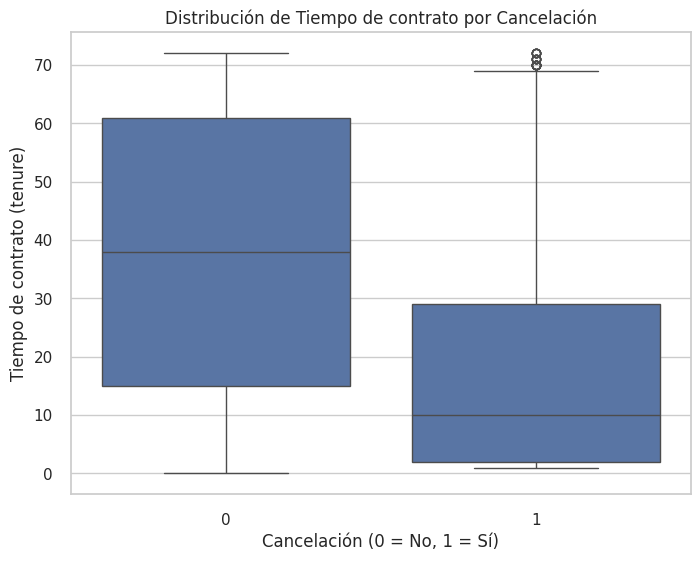

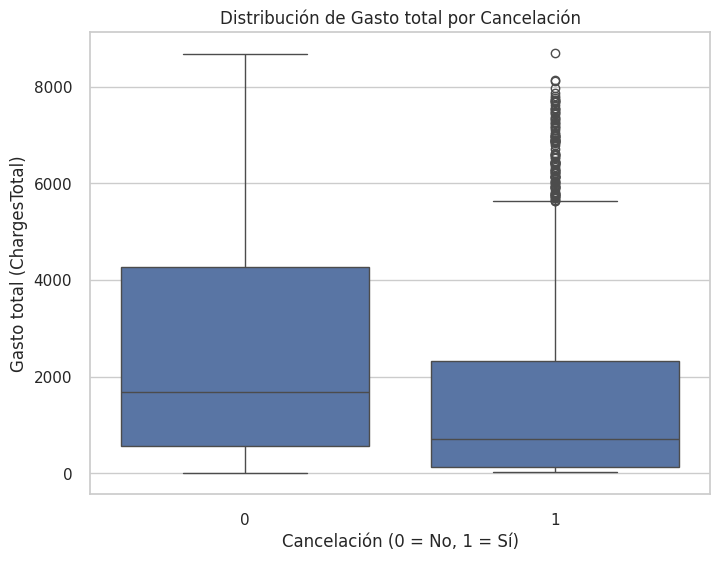

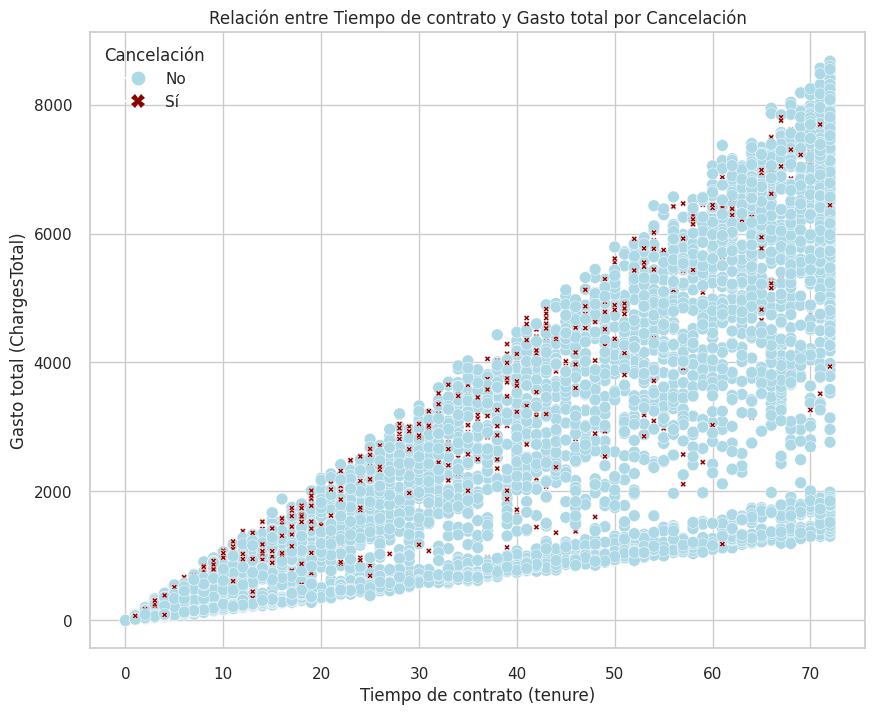

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de los gráficos
sns.set(style="whitegrid")
# Definir una paleta personalizada
custom_palette = {0: "lightblue", 1: "darkred"}

# Boxplot: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Distribución de Tiempo de contrato por Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Tiempo de contrato (tenure)')
plt.show()

# Boxplot: Gasto total vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='ChargesTotal', data=datos)
plt.title('Distribución de Gasto total por Cancelación')
plt.xlabel('Cancelación (0 = No, 1 = Sí)')
plt.ylabel('Gasto total (ChargesTotal)')
plt.show()

# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Cancelación
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tenure', y='ChargesTotal', hue='Churn', style='Churn', size='Churn',palette=custom_palette, data=datos)

# Personalizar la leyenda para asegurar que los colores y etiquetas sean correctos
plt.legend (title='Cancelación', labels=['No', 'Sí'],
 handles=[plt.Line2D([0], [0], marker='o', color='w',
 markerfacecolor='lightblue', markersize=10),
 plt.Line2D([0], [0], marker='X', color='w',
 markerfacecolor='darkred', markersize=10)])

plt.title('Relación entre Tiempo de contrato y Gasto total por Cancelación')
plt.xlabel('Tiempo de contrato (tenure)')
plt.ylabel('Gasto total (ChargesTotal)')
plt.show()

# **Ajustando modelos**

## **1.   Modelo de Referencia**

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
modelo_dummy = DummyClassifier()
modelo_dummy.fit(X_train, y_train)
print(f'Exactitud del modelo en el conjunto de prueba: {modelo_dummy.score(X_test, y_test):.2%}')

Exactitud del modelo en el conjunto de prueba: 73.37%


## **2.   Árboles de Decisión**

### **Decision Tree**

Usaremos `DecisionTreeClassifier` como modelo de classificación.Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de menor y mayor en los valores de las columnas de la base de datos. El índice GINI calcula qué tan mezcladas están las clases. Varía de 1 a 0, dónde 0 es perfectamente separado y, 1 -completamente mezclado.

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline as imbpipeline

In [22]:
modelo_arbol = DecisionTreeClassifier(max_depth=5)

# Crear pipeline
pipeline_arbol = imbpipeline(steps=[('oversample', SMOTE()), ('arbol', modelo_arbol)])
skf_arbol = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Validación cruzada
cv_resultados_arbol = cross_validate(pipeline_arbol, X_train, y_train, cv=skf_arbol, scoring='recall')
promedio_arbol = cv_resultados_arbol['test_score'].mean()
desvio_std_arbol = cv_resultados_arbol['test_score'].std()

# valor igual a 1 = 100% aprendizaje
print(f'Puntaje de recall en validación cruzada: {cv_resultados_arbol["test_score"]}')
print(f'Promedio recall: {promedio_arbol:.3f} (± {desvio_std_arbol:.3f})')
print(f'El intervalo de confianza aproximado: {promedio_arbol-2*desvio_std_arbol:.3f}, {min(promedio_arbol+2*desvio_std_arbol,1):.3f}')

Puntaje de recall en validación cruzada: [0.65037594 0.69662921 0.65413534 0.61278195 0.63909774]
Promedio recall: 0.651 (± 0.027)
El intervalo de confianza aproximado: 0.596, 0.705


In [23]:
print(nombres_columnas)

['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PhoneService_Si', 'tenure', 'PaperlessBilling', 'ChargesMonthly', 'ChargesTotal']


In [24]:
valores_columnas = ['Múltiples Líneas: No', 'Múltiples Líneas: Sin servicio telefónico', 'Múltiples Líneas: Sí'
                    , 'Servicio Internet: DSL', 'Servicio Internet: Fibra óptica', 'Servicio Internet: No'
                    , 'Seguridad Online: No', 'Seguridad Online: Sin servicio internet', 'Seguridad Online: Sí'
                    , 'Online Backup: No', 'OnlineBackup: Sin servicio internet', 'Online Backup: Yes'
                    , 'Protección del equipo: No', 'Protección del equipo: Sin servicio internet', 'Protección del equipo: Sí'
                    , 'Soporte técnico: No', 'Soporte técnico: Sin servicio internet', 'Soporte técnico: Sí'
                    , 'StreamingTV: No', 'StreamingTV: Sin servicio internet', 'StreamingTV: Sí'
                    , 'StreamingMovies: No', 'StreamingMovies: Sin servicio internet', 'StreamingMovies: Sí'
                    , 'Contracto mes a mes', 'Contracto anular', 'Contracto por 2 años'
                    , 'Método de pago: Transferencia (automática)', 'Método de pago: TC (automática)'
                    , 'Método de pago: Cheque electrónico', 'Método de pago: Cheque por correo'
                    , 'Servicio telefónico: Sí', 'Permanencia', 'Facturación electrónica'
                    , 'Cargos Mensuales', 'Total de Cargos']



In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

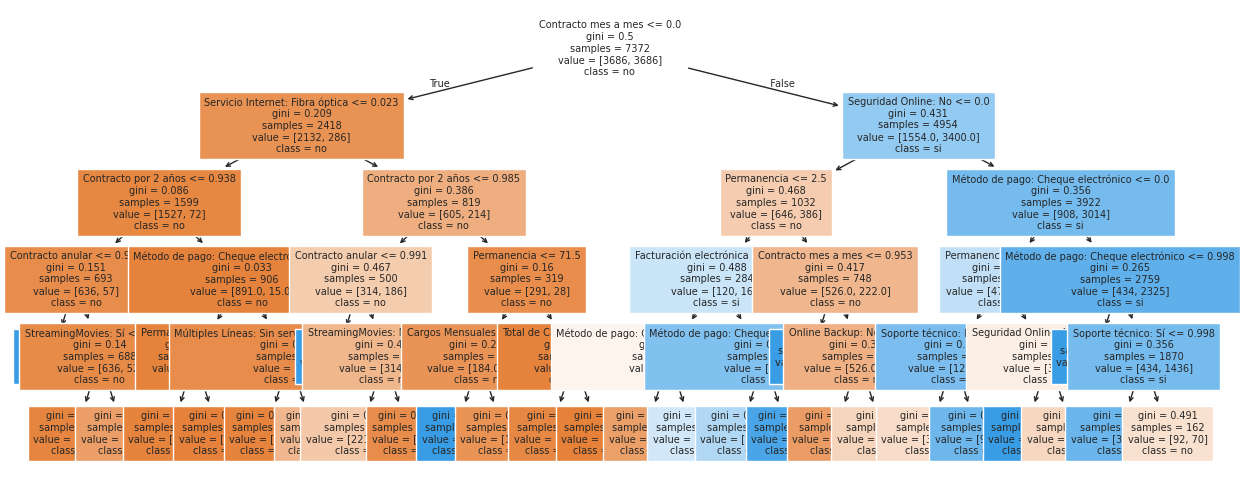

In [26]:
# Entrenar en todo el set de entrenamiento
pipeline_arbol.fit(X_train, y_train)

# Extraer el árbol entrenado desde el pipeline
modelo_arbol_entrenado = pipeline_arbol.named_steps['arbol']

plt.figure(figsize=(15,6))
plot_tree(modelo_arbol_entrenado, feature_names=valores_columnas, filled=True
          , class_names=['no', 'si'], fontsize=7)
plt.show()

### Probando el modelo Decision Tree

Al entrenar un modelo con la variable desbalanceada, puede ser que el patrón de los datos para la clase dominante sobresalga en relación a la clase con menor frecuencia, generando un modelo con un desempeño muy bajo para clasificar la clase de menor frecuencia.

Usaremos la estrategia de oversampling que consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestará más atención al patrón de los datos de la clase que tenía menor frecuencia al principio y podrá diferenciar mejor las dos clases.

In [27]:
from sklearn.metrics import classification_report
# para presentar graficamente la matriz de confución
from sklearn.metrics import ConfusionMatrixDisplay


=== Evaluación en conjunto de validación ===
              precision    recall  f1-score   support

          no       0.84      0.85      0.84      1229
          si       0.57      0.54      0.56       444

    accuracy                           0.77      1673
   macro avg       0.70      0.70      0.70      1673
weighted avg       0.77      0.77      0.77      1673



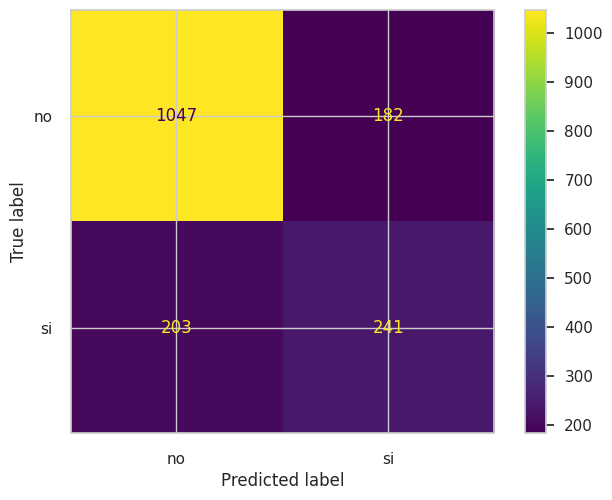

In [28]:
# Evaluación en conjunto de validación (X_val, y_val)
y_arbol_previsto = pipeline_arbol.predict(X_val)

print("\n=== Evaluación en conjunto de validación ===")
print(classification_report(y_val, y_arbol_previsto, target_names=['no', 'si']))
# en el eje Y van los valores reales y (1 -evadido, 0 -permanece) en el eje X los valores previstos
ConfusionMatrixDisplay.from_predictions(y_val, y_arbol_previsto, display_labels=['no','si']);

### **Random Forest**

Utilizaremos el algoritmo `Random Forest` para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y comparar los resultados con el resultado del árbol de decisión.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate

In [30]:
# Modelo base
modelo_forest = RandomForestClassifier(
    n_estimators=200,  # cantidad de árboles
    max_depth=5,       # profundidad máxima
    random_state=5,
    n_jobs=-1,         # usar todos los núcleos disponibles
    class_weight="balanced"
)

# Crear pipeline
pipeline_forest = imbpipeline(steps=[
      ('oversample', SMOTE(random_state=5)),
    #, ('feature_selection', SelectFromModel(modelo_forest, threshold="median"))  # Selección automática
      ('forest', modelo_forest)
])

# Validación cruzada
skf_forest = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_forest = cross_validate(
    pipeline_forest, X_train, y_train,
    cv=skf_forest, scoring='recall'
)

promedio_forest = cv_resultados_forest['test_score'].mean()
desvio_std_forest = cv_resultados_forest['test_score'].std()

# valor igual a 1 = 100% aprendizaje
print(f'Puntaje de recall en validación cruzada: {cv_resultados_forest["test_score"]}')
print(f'Promedio recall: {promedio_forest:.3f} (± {desvio_std_forest:.3f})')
print(f'El intervalo de confianza aproximado: {promedio_forest-2*desvio_std_forest:.3f}, {min(promedio_forest+2*desvio_std_forest,1):.3f}')

Puntaje de recall en validación cruzada: [0.73684211 0.72284644 0.68421053 0.70300752 0.65037594]
Promedio recall: 0.699 (± 0.030)
El intervalo de confianza aproximado: 0.639, 0.760


### **Probando el modelo Random Forest**

In [31]:
# para presentar graficamente la matriz de confución
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)


******* Rendimiento en validación *******
[[948 281]
 [127 317]]
              precision    recall  f1-score   support

          no       0.88      0.77      0.82      1229
          si       0.53      0.71      0.61       444

    accuracy                           0.76      1673
   macro avg       0.71      0.74      0.72      1673
weighted avg       0.79      0.76      0.77      1673



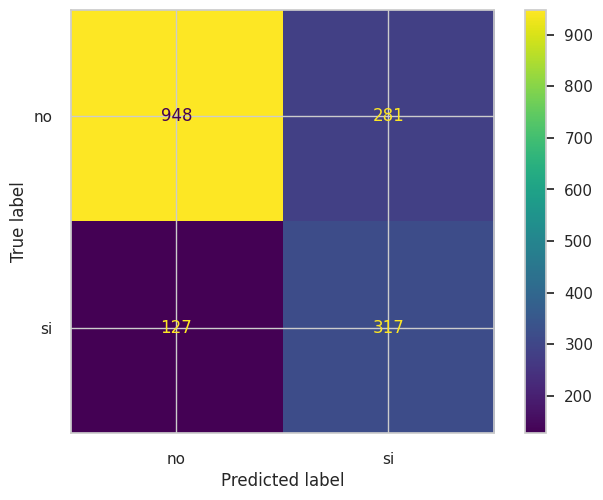

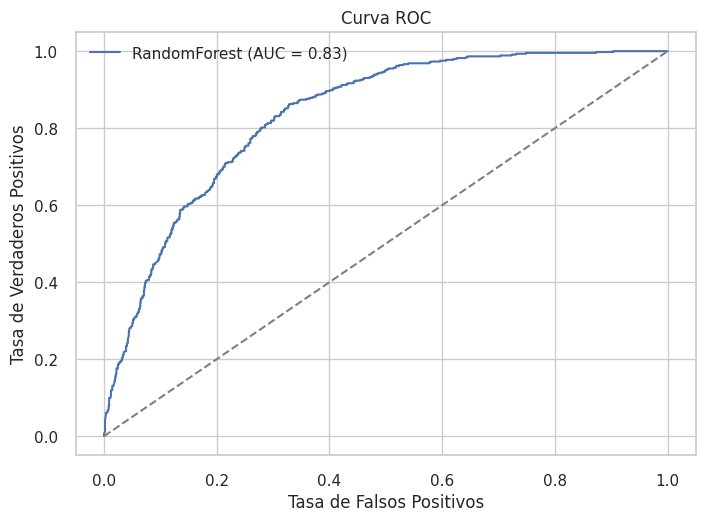

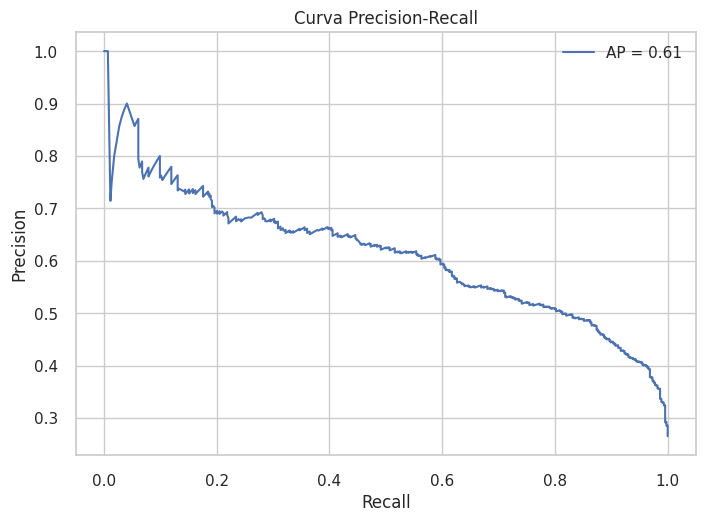

In [32]:
# Entrenar en todo el set de entrenamiento
pipeline_forest.fit(X_train, y_train)

# Evaluación en conjunto de validación
y_forest_previsto = pipeline_forest.predict(X_val)

print("\n******* Rendimiento en validación *******")
print(confusion_matrix(y_val, y_forest_previsto))
print(classification_report(y_val, y_forest_previsto, target_names=['no', 'si']))

ConfusionMatrixDisplay.from_predictions(y_val, y_forest_previsto, display_labels=['no','si'])
plt.show()

# Probabilidades predichas
y_proba = pipeline_forest.predict_proba(X_val)[:,1]

# --- Curva ROC ---
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = roc_auc_score(y_val, y_proba)

plt.plot(fpr, tpr, label=f'RandomForest (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

# --- Curva Precision-Recall ---
prec, rec, _ = precision_recall_curve(y_val, y_proba)
ap = average_precision_score(y_val, y_proba)

plt.plot(rec, prec, label=f'AP = {ap:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall")
plt.legend()
plt.show()

## **3.   Modelos basados en distancia**

Modelos basados en distancia, como **KNN**, **SVM**, **Regresión Logística** y **Redes Neuronales**, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como **Decision Tree**, **Random Forest** y **XGBoost**, no son sensibles a la escala de los datos.

### **KNN (k-Nearest Neighbors)**

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [33]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# Definir modelo
modelo_knn = KNeighborsClassifier()

# Crear pipeline con normalización incluida
pipeline_knn = imbpipeline(steps=[
    ('oversample', SMOTE(random_state=5)),
    ('normalizacion', MinMaxScaler()),
    ('knn', modelo_knn)
])

# Validación cruzada
skf_knn = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados_knn = cross_validate(pipeline_knn, X_train, y_train, cv=skf_knn, scoring='recall')

# Resultados
promedio_knn = cv_resultados_knn['test_score'].mean()
desvio_std_knn = cv_resultados_knn['test_score'].std()

# valor igual a 1 = 100% aprendizaje
print(f'Puntaje de recall en validación cruzada: {cv_resultados_knn["test_score"]}')
print(f'Promedio recall: {promedio_forest:.3f} (± {desvio_std_knn:.3f})')
print(f'El intervalo de confianza aproximado: {promedio_knn-2*desvio_std_knn:.3f}, {min(promedio_knn+2*desvio_std_knn,1):.3f}')

Puntaje de recall en validación cruzada: [0.67293233 0.64794007 0.65037594 0.67669173 0.65037594]
Promedio recall: 0.699 (± 0.012)
El intervalo de confianza aproximado: 0.635, 0.685


### **Probando el modelo KNN**

In [35]:
from sklearn.metrics import classification_report
# para presentar graficamente la matriz de confución
from sklearn.metrics import ConfusionMatrixDisplay


=== Evaluación en conjunto de validación ===
              precision    recall  f1-score   support

          no       0.84      0.71      0.77      1229
          si       0.44      0.62      0.51       444

    accuracy                           0.69      1673
   macro avg       0.64      0.67      0.64      1673
weighted avg       0.73      0.69      0.70      1673



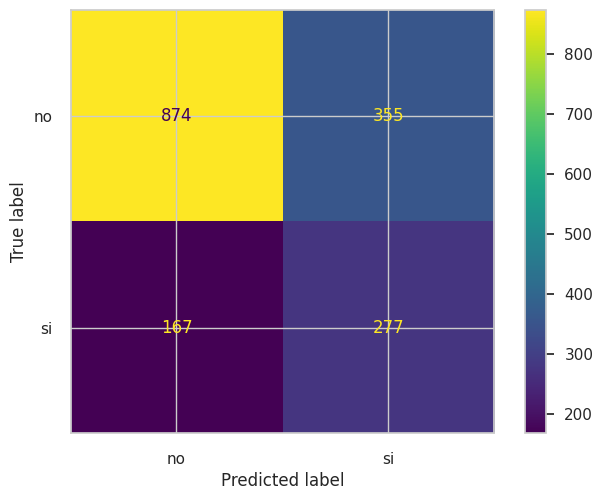

In [36]:
# Entrenar en todo el set de entrenamiento
pipeline_knn.fit(X_train, y_train)

# Evaluación en conjunto de validación (X_val, y_val)
y_knn_previsto = pipeline_knn.predict(X_val)

print("\n=== Evaluación en conjunto de validación ===")
print(classification_report(y_val, y_knn_previsto, target_names=['no', 'si']))
# en el eje Y van los valores reales y (1 -evadido, 0 -permanece) en el eje X los valores previstos
ConfusionMatrixDisplay.from_predictions(y_val, y_knn_previsto, display_labels=['no','si']);

# **Informes de métricas**

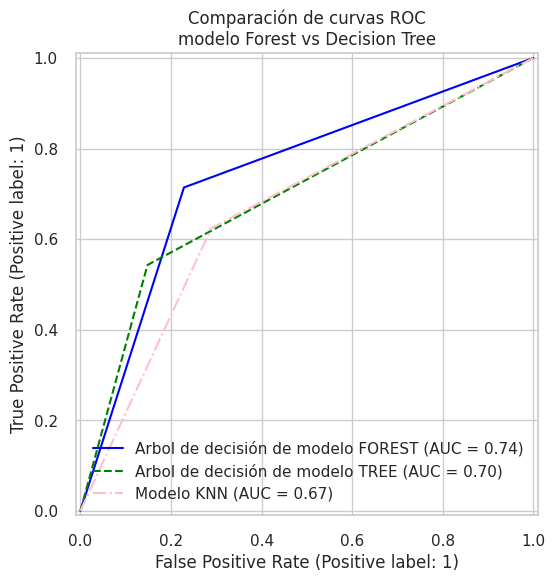

In [37]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# Dibujar cada curva ROC
RocCurveDisplay.from_predictions(y_val, y_forest_previsto
                                 , ax=ax, color='blue'
                                 , name='Arbol de decisión de modelo FOREST')
RocCurveDisplay.from_predictions(y_val, y_arbol_previsto
                                 , ax=ax, linestyle='--', color='green'
                                 , name='Arbol de decisión de modelo TREE')#, ax = curva_roc.ax_)
RocCurveDisplay.from_predictions(y_val, y_knn_previsto
                                 , ax=ax, linestyle='-.', color='pink'
                                 , name='Modelo KNN') #, ax = curva_roc.ax_)

# Títulos
ax.set_title("Comparación de curvas ROC\nmodelo Forest vs Decision Tree")
plt.show()

# **Feature importances (atributos más importantes del modelo)**

Vamos a evaluar cuales son y cuantas columnas necesitamos para entrenar el modelo, segun como estas afectan a las metricas.

In [38]:
importances = modelo_forest.feature_importances_

In [39]:
feature_importances = pd.DataFrame({"Features": X.columns, "Importances": (importances*100).round(2)}).sort_values("Importances", ascending=False)
feature_importances

,Features,Importances
24,Contract_Month-to-month,18.13
15,TechSupport_No,13.19
6,OnlineSecurity_No,11.47
29,PaymentMethod_Electronic check,9.26
32,tenure,5.79
26,Contract_Two year,5.78
9,OnlineBackup_No,5.30
12,DeviceProtection_No,4.25
35,ChargesTotal,3.97
25,Contract_One year,3.37


In [40]:
selected_features = feature_importances['Features'].values[:15]
X_selected_features = X[selected_features]

X_selected_features

,Contract_Month-to-month,TechSupport_No,OnlineSecurity_No,PaymentMethod_Electronic check,tenure,Contract_Two year,OnlineBackup_No,DeviceProtection_No,ChargesTotal,Contract_One year,OnlineSecurity_Yes,TechSupport_Yes,InternetService_Fiber optic,PaperlessBilling,OnlineBackup_Yes
1448,0.0,0.0,0.0,0.0,14.0,1.0,0.0,0.0,263.65,0.0,0.0,0.0,0.0,1.0,0.0
343,0.0,0.0,0.0,0.0,57.0,1.0,0.0,0.0,1087.70,0.0,0.0,0.0,0.0,1.0,0.0
3500,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,1010.00,1.0,1.0,1.0,0.0,0.0,1.0
2932,0.0,0.0,1.0,0.0,36.0,0.0,0.0,1.0,2511.95,1.0,0.0,1.0,0.0,1.0,1.0
67,0.0,0.0,0.0,1.0,49.0,0.0,1.0,0.0,4059.35,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,0.0,0.0,0.0,0.0,35.0,1.0,0.0,0.0,3914.05,0.0,1.0,1.0,1.0,1.0,1.0
2936,0.0,1.0,1.0,0.0,26.0,0.0,1.0,1.0,1295.40,1.0,0.0,0.0,0.0,1.0,0.0
2846,1.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,141.70,0.0,0.0,0.0,0.0,0.0,0.0
6661,0.0,1.0,0.0,0.0,70.0,1.0,0.0,0.0,5600.15,0.0,1.0,0.0,0.0,1.0,1.0


In [41]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_selected_features, y, random_state=5)

In [42]:
param_grid = {
    'forest__max_depth': [5, 10, 15],
    'forest__n_estimators': [100, 200, 300],
    'forest__class_weight': [None, 'balanced']
}

In [43]:
from sklearn.model_selection import GridSearchCV

# Modelo base
modelo = RandomForestClassifier(
    random_state=5,
    n_jobs=-1,         # usar todos los núcleos disponibles
)

# Crear pipeline
pipeline = imbpipeline(steps=[
      ('oversample', SMOTE(random_state=5)),
      ('forest', modelo)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
model_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
model_grid.fit(X_train_grid, y_train_grid)

print("Mejores parámetros:", model_grid.best_params_)
print("Mejor recall en CV:", model_grid.best_score_)

Mejores parámetros: {'forest__class_weight': None, 'forest__max_depth': 5, 'forest__n_estimators': 200}
Mejor recall en CV: 0.697378277153558


In [45]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report

def calcular_metricas(y_test, y_pred):
    # Calcular métricas
    metricas = {
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'accuracy': accuracy_score(y_test, y_pred)
    }

    # Imprimir reporte de clasificación detallado
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Sí']))

    return metricas

In [46]:
y_pred_grid = model_grid.predict(X_test_grid)
metricas_model_grid = calcular_metricas(y_test_grid, y_pred_grid)
print('Métricas del modelo grid:', metricas_model_grid)

Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.89      0.79      0.84      1233
          Sí       0.55      0.71      0.62       440

    accuracy                           0.77      1673
   macro avg       0.72      0.75      0.73      1673
weighted avg       0.80      0.77      0.78      1673

Métricas del modelo grid: {'recall': 0.7113636363636363, 'precision': 0.551056338028169, 'f1_score': 0.621031746031746, 'accuracy': 0.771667662881052}


# **Escogiendo y serializando el mejor modelo**

### **Evaluamos la tasa de acierto de los modelos**

In [47]:
lista_modelos = [
    ('dummy', modelo_dummy, X_test),
    ('arbol', modelo_arbol, X_test),
    ('random forest', modelo_forest, X_test),
    ('knn', pipeline_knn, X_test)
]

In [48]:
for nombre, modelo, X in lista_modelos:
    print(f'La exactidud del modelo {nombre} es: {modelo.score(X, y_test)}')

La exactidud del modelo dummy es: 0.7337110481586402
La exactidud del modelo arbol es: 0.7790368271954674
La exactidud del modelo random forest es: 0.7648725212464589
La exactidud del modelo knn es: 0.71671388101983


## **Serializando los modelos**

In [ ]:
# almacena el modelo con mejor precisión en un archivo
import joblib

In [ ]:
# exportar el modelo entrenado a un archivo
joblib.dump(modelo_forest, 'modelo_churn_forest_II.pkl')
joblib.dump(modelo_arbol, 'modelo_churn_arbol_champion.pkl')
joblib.dump(modelo_knn, 'modelo_churn_knn_IV.pkl')
joblib.dump(modelo_dummy, 'modelo_churn_dummy_III.pkl')

# **Conclusión**

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

